##Mundru Dharani Harshitha

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df=pd.read_csv('/content/Mall_Customers[1].csv')

In [86]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
df.shape

(200, 5)

###Checking for null values

In [88]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [89]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

###There are no null values present

###Converting categorical column

In [90]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [91]:
df.Gender=le.fit_transform(df.Gender)

In [92]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


###Data Visualization

##Univariate

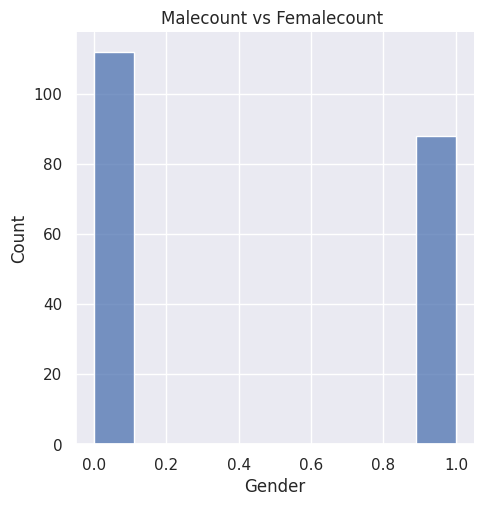

In [93]:
sns.displot(df.Gender)
plt.title("Malecount vs Femalecount ")
plt.show()

<ipython-input-94-4eeaeec93b38>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


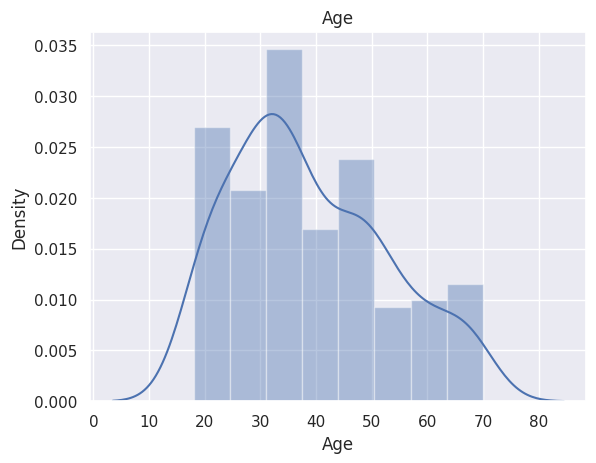

In [94]:
sns.distplot(df['Age'])
plt.title("Age")
plt.show()

<Axes: >

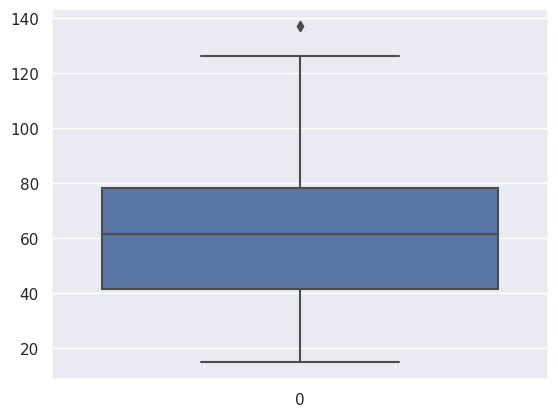

In [95]:
sns.boxplot(df['Annual Income (k$)'])

##Bi variate

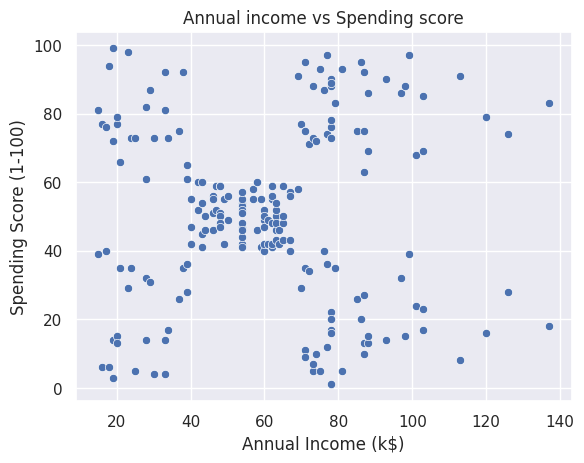

In [96]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])
plt.title("Annual income vs Spending score")
plt.show()

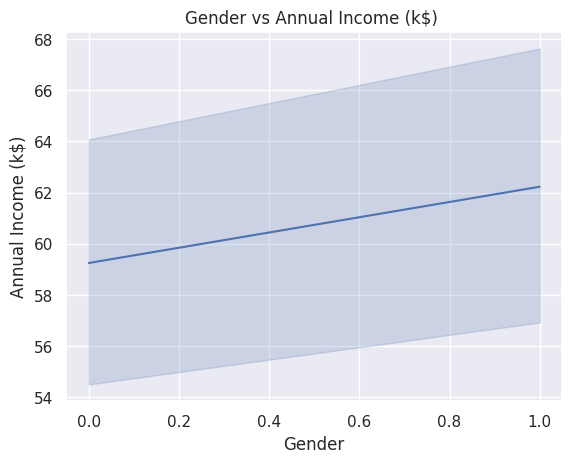

In [97]:
sns.lineplot(x=df['Gender'],y=df['Annual Income (k$)'])
plt.title("Gender vs Annual Income (k$) ")
plt.show()

##Multivariate

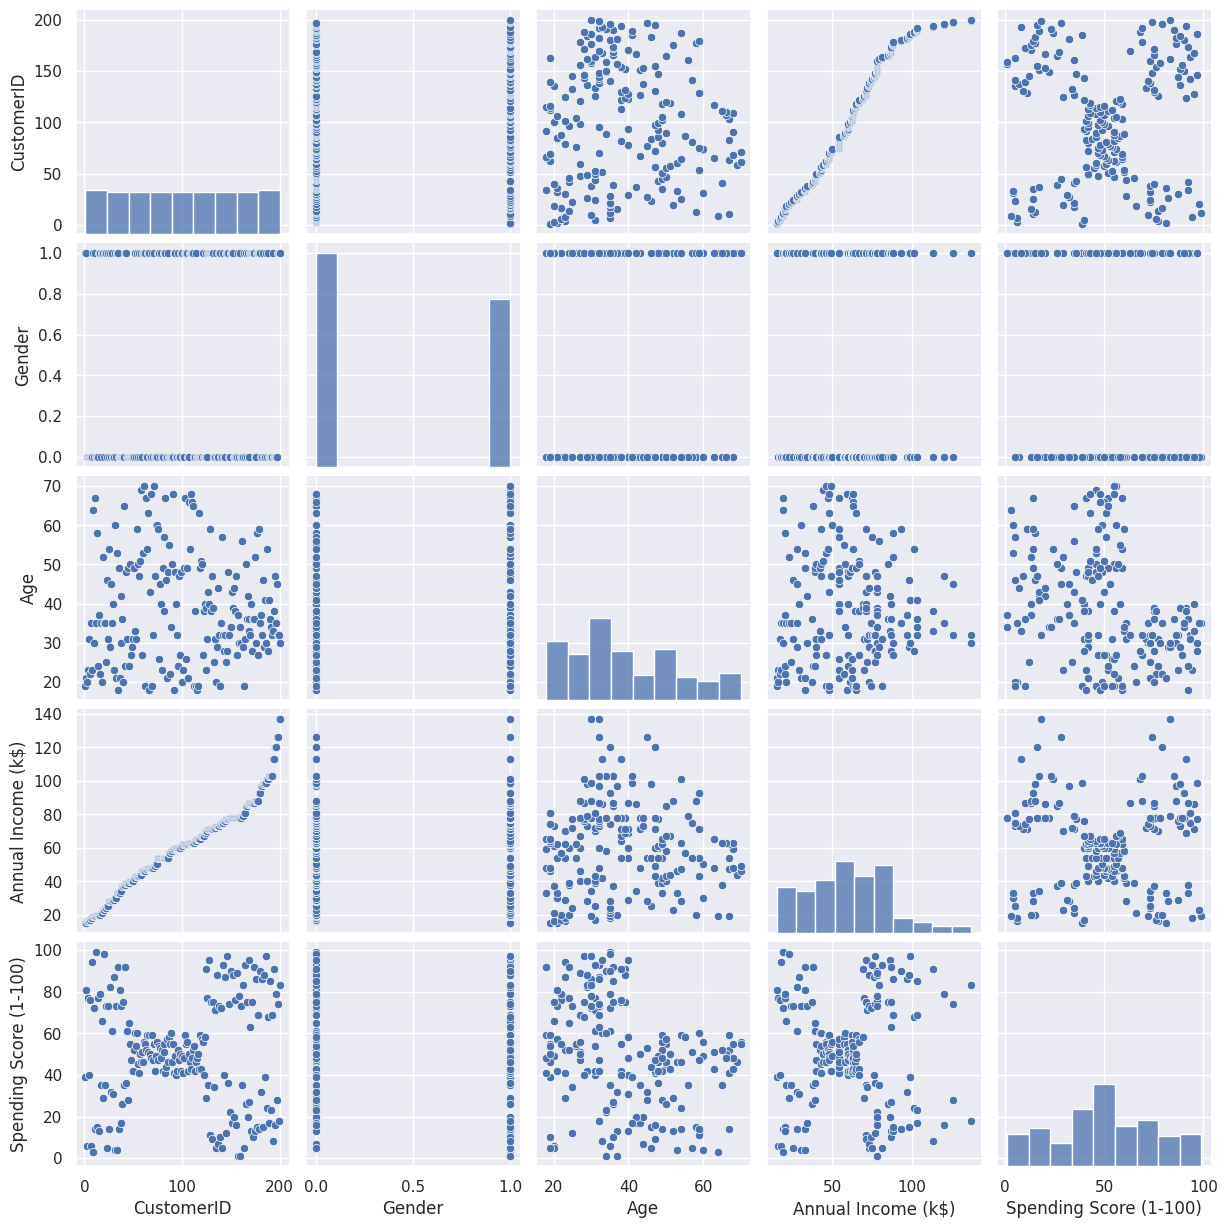

In [98]:
sns.pairplot(df)

<Axes: >

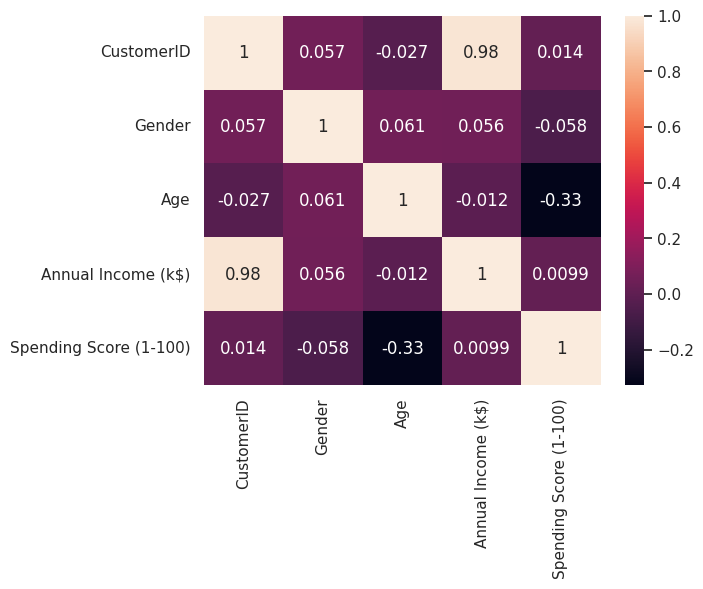

In [99]:
sns.heatmap(df.corr(),annot=True)

###Checking for outliers

<Axes: >

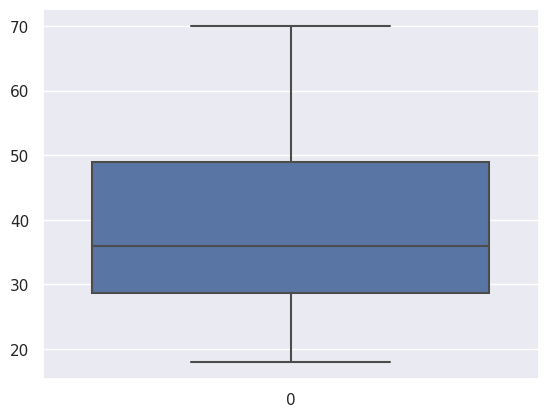

In [100]:
sns.boxplot(df['Age'])

<Axes: >

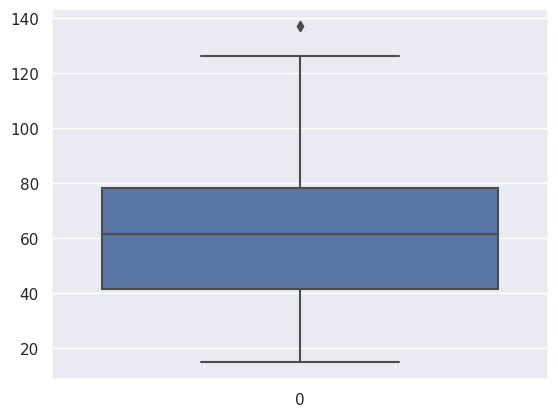

In [101]:
sns.boxplot(df['Annual Income (k$)'])

There are some outliers in annual income feature so we will replace them

In [102]:
df['Annual Income (k$)'].median()

61.5

In [103]:
q3=df['Annual Income (k$)'].quantile(0.75)
q1=df['Annual Income (k$)'].quantile(0.25)

In [104]:
IQR=q3-q1
IQR

36.5

In [105]:
ul=q3+1.5*IQR
ul

132.75

In [106]:
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>ul,df['Annual Income (k$)'].median(),df['Annual Income (k$)'])

<Axes: >

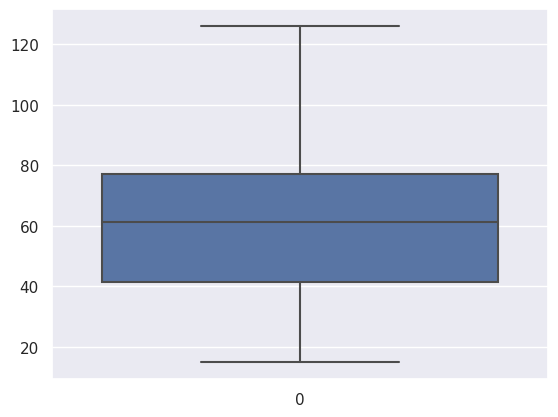

In [107]:
sns.boxplot(df['Annual Income (k$)'])

###We replaced the outliers present here

<Axes: >

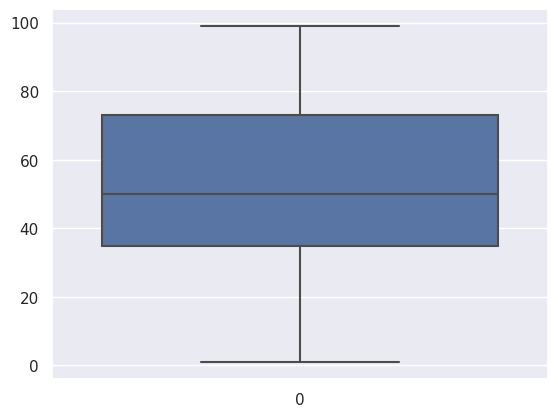

In [108]:
sns.boxplot(df['Spending Score (1-100)'])

In [109]:
x=df.drop(columns=('Spending Score (1-100)'))
x.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,15.0
1,2,1,21,15.0
2,3,0,20,16.0
3,4,0,23,16.0
4,5,0,31,17.0


In [110]:
y=df['Spending Score (1-100)']
y.head()

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

Scaling independent variables

In [111]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [112]:
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled

,CustomerID,Gender,Age,Annual Income (k$)
0,0.000000,1.0,0.019231,0.000000
1,0.005025,1.0,0.057692,0.000000
2,0.010050,0.0,0.038462,0.009009
3,0.015075,0.0,0.096154,0.009009
4,0.020101,0.0,0.250000,0.018018
...,...,...,...,...
195,0.979899,0.0,0.326923,0.945946
196,0.984925,0.0,0.519231,1.000000
197,0.989950,1.0,0.269231,1.000000
198,0.994975,1.0,0.269231,0.418919


Implementing K-means algorithm

In [113]:
from sklearn.cluster import KMeans

In [114]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df.drop(columns = ["Age","Gender"]))
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

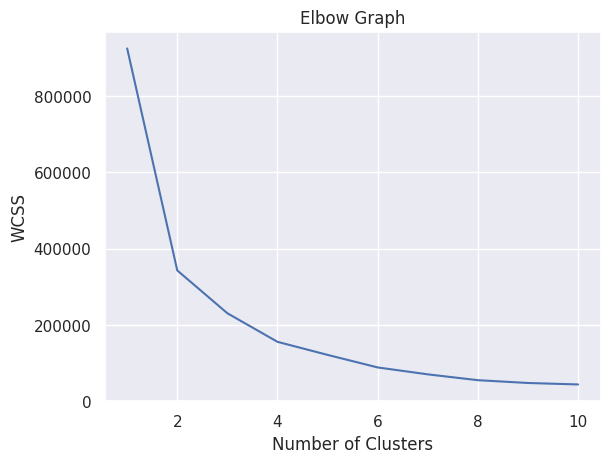

In [115]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [116]:
model = KMeans(n_clusters = 5)
df['cluster'] = model.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


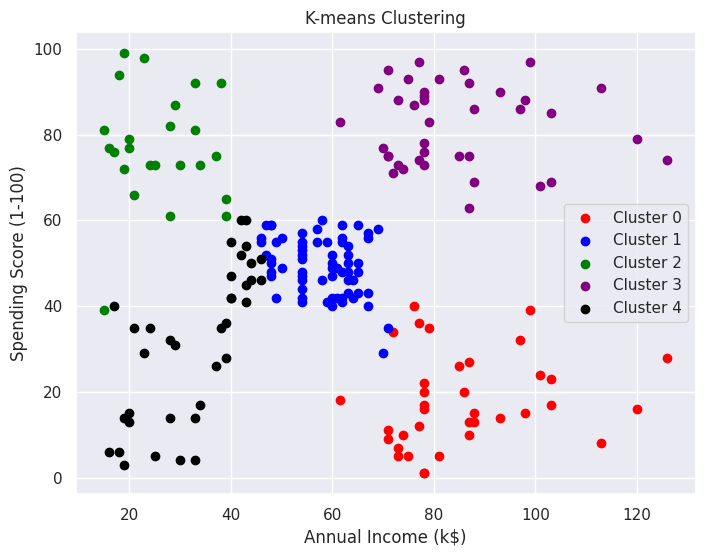

In [117]:
plt.figure(figsize=(8, 6))

colors = ['red', 'blue', 'green', 'purple','black']

for cluster_label, color in zip(range(5), colors):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], c=color, label=f'Cluster {cluster_label}')

plt.title('K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [118]:
cluster0=df[df.cluster==0]
print(len(cluster0))
print(cluster0["CustomerID"].values)

36
[129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159 161 163
 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]


In [119]:
cluster1=df[df.cluster==1]
print(len(cluster1))
print(cluster1["CustomerID"].values)

65
[ 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 125 127]


In [120]:
cluster2=df[df.cluster==2]
print(len(cluster2))
print(cluster2["CustomerID"].values)

24
[ 1  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46]


In [121]:
cluster3=df[df.cluster==3]
print(len(cluster3))
print(cluster3["CustomerID"].values)

39
[124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]


In [122]:
cluster4=df[df.cluster==4]
print(len(cluster4))
print(cluster4["CustomerID"].values)

36
[ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 48
 49 50 51 52 53 54 55 56 57 58 59 60]


##Thank You